In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
#import cudf 
import numpy as np

In [2]:
data = pd.read_csv("./merged_DishInText.csv")

In [3]:
data

,Unnamed: 0,business_id,stars,useful,funny,cool,DishInText
0,0,MTSW4McQd7CbVtyjqoe9mw,4.0,0,0,1,{'rice'}
1,1,MTSW4McQd7CbVtyjqoe9mw,4.0,3,1,2,{'rice'}
2,5,MTSW4McQd7CbVtyjqoe9mw,4.0,1,0,0,"{'english', 'rice'}"
3,7,MTSW4McQd7CbVtyjqoe9mw,4.0,3,4,10,{'bread'}
4,8,MTSW4McQd7CbVtyjqoe9mw,4.0,0,0,0,{'rice'}
...,...,...,...,...,...,...,...
2445689,5126133,hn9Toz3s-Ei3uZPt7esExA,5.0,0,0,0,"{'rice', 'pita'}"
2445690,5126134,hn9Toz3s-Ei3uZPt7esExA,4.0,0,0,0,{'bread'}
2445691,5126135,hn9Toz3s-Ei3uZPt7esExA,5.0,2,0,2,"{'rice', 'naan', 'pita'}"
2445692,5126137,hn9Toz3s-Ei3uZPt7esExA,5.0,1,1,1,{'pita'}


In [4]:
data['weight'] = 1 + (data['useful'] + 0.5 * data['funny'] + 0.5 * data['cool'])**(1/3)

<AxesSubplot:>

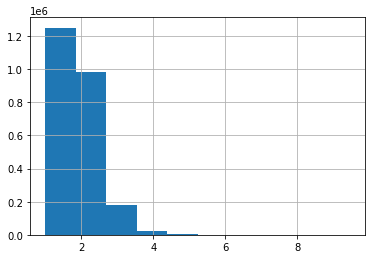

In [5]:
data['weight'].hist()

In [6]:
data['weighted_score'] = (data['stars'] - 3) * data['weight']

<AxesSubplot:>

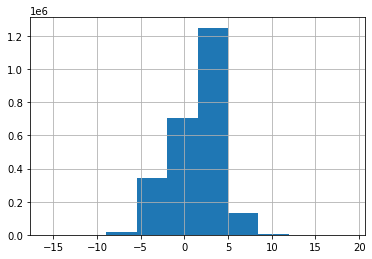

In [7]:
data['weighted_score'].hist()

In [8]:
all_business = set(data['business_id'])

In [9]:
len(data), len(all_business)

(2445694, 63631)

In [10]:
import re
data["expanded_DishInText"] = data['DishInText'].apply(lambda x: (re.findall(r"'(.*?)'", x)))

In [11]:
expanded_data = data.explode('expanded_DishInText', ignore_index = True)


In [12]:
data.loc[data['business_id'] == 'MTSW4McQd7CbVtyjqoe9mw', :]

,Unnamed: 0,business_id,stars,useful,funny,cool,DishInText,weight,weighted_score,expanded_DishInText
0,0,MTSW4McQd7CbVtyjqoe9mw,4.0,0,0,1,{'rice'},1.793701,1.793701,[rice]
1,1,MTSW4McQd7CbVtyjqoe9mw,4.0,3,1,2,{'rice'},2.650964,2.650964,[rice]
2,5,MTSW4McQd7CbVtyjqoe9mw,4.0,1,0,0,"{'english', 'rice'}",2.000000,2.000000,"[english, rice]"
3,7,MTSW4McQd7CbVtyjqoe9mw,4.0,3,4,10,{'bread'},3.154435,3.154435,[bread]
4,8,MTSW4McQd7CbVtyjqoe9mw,4.0,0,0,0,{'rice'},1.000000,1.000000,[rice]
5,9,MTSW4McQd7CbVtyjqoe9mw,4.0,0,0,0,"{'chocolate', 'rice'}",1.000000,1.000000,"[chocolate, rice]"
6,10,MTSW4McQd7CbVtyjqoe9mw,4.0,0,0,0,{'bread'},1.000000,1.000000,[bread]
7,11,MTSW4McQd7CbVtyjqoe9mw,4.0,0,0,1,"{'soy milk', 'hot dog'}",1.793701,1.793701,"[soy milk, hot dog]"
8,20,MTSW4McQd7CbVtyjqoe9mw,5.0,1,0,0,{'rice'},2.000000,4.000000,[rice]
9,21,MTSW4McQd7CbVtyjqoe9mw,5.0,0,0,0,{'english'},1.000000,2.000000,[english]


In [13]:
expanded_data.loc[expanded_data['business_id'] == 'MTSW4McQd7CbVtyjqoe9mw', :]

,Unnamed: 0,business_id,stars,useful,funny,cool,DishInText,weight,weighted_score,expanded_DishInText
0,0,MTSW4McQd7CbVtyjqoe9mw,4.0,0,0,1,{'rice'},1.793701,1.793701,rice
1,1,MTSW4McQd7CbVtyjqoe9mw,4.0,3,1,2,{'rice'},2.650964,2.650964,rice
2,5,MTSW4McQd7CbVtyjqoe9mw,4.0,1,0,0,"{'english', 'rice'}",2.000000,2.000000,english
3,5,MTSW4McQd7CbVtyjqoe9mw,4.0,1,0,0,"{'english', 'rice'}",2.000000,2.000000,rice
4,7,MTSW4McQd7CbVtyjqoe9mw,4.0,3,4,10,{'bread'},3.154435,3.154435,bread
...,...,...,...,...,...,...,...,...,...,...
59,82,MTSW4McQd7CbVtyjqoe9mw,5.0,1,0,0,"{'mooncake', 'rice'}",2.000000,4.000000,rice
60,83,MTSW4McQd7CbVtyjqoe9mw,4.0,1,0,0,"{'baozi', 'bread'}",2.000000,2.000000,baozi
61,83,MTSW4McQd7CbVtyjqoe9mw,4.0,1,0,0,"{'baozi', 'bread'}",2.000000,2.000000,bread
62,84,MTSW4McQd7CbVtyjqoe9mw,5.0,35,14,26,{'rice'},4.802952,9.605905,rice


In [14]:
print(len(set(expanded_data.loc[expanded_data['business_id'] == 'MTSW4McQd7CbVtyjqoe9mw', :]["expanded_DishInText"])))

17


In [18]:
def OneRestScore(df_one_rest: pd.DataFrame, buz_id: str):
  dish_candidate = set(df_one_rest.loc[df_one_rest['business_id'] == buz_id, 'expanded_DishInText'])
  dish_dict = {}
  for dish in dish_candidate:
      score = df_one_rest.loc[(df_one_rest['business_id'] == buz_id) 
                                & (df_one_rest['expanded_DishInText'] == dish), 'weighted_score']
      dish_dict[dish] = score.mean()
  return dish_dict

In [19]:
def AllRestScore(df: pd.DataFrame):
  start = 0 
  end = 0
  count = 0
  buz_dict = {}
  while end < len(df)-1  :
    count += 1
    while (df.at[start, "business_id"] == df.at[end, "business_id"]) and end<len(df)-1:
      end +=1
    buz = df.at[start, "business_id"]
    temp_df = df[start:end]
    buz_dict[buz] = OneRestScore(temp_df, buz)
    start = end
    #dishset = set(df.loc[start:end, "expanded_DishInText"])
    #df.loc[start:end, "dishset"] = str(dishset)
    
    #print(df.at[end, "business_id"], str(dishset))
    if count%1000 ==0:
      print(count)
  return buz_dict

In [20]:
score = AllRestScore(expanded_data)
print(len(score['MTSW4McQd7CbVtyjqoe9mw']))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
17


In [21]:
score["hn9Toz3s-Ei3uZPt7esExA"]

{'naan': 4.884499140614817,
 'rice': 2.7389747792693924,
 'boule': -2.0,
 'bread': 1.0,
 'pita': 3.4426364784217878}

In [101]:
score_table = pd.DataFrame.from_dict(score, orient='index')

In [103]:
score_table.head()
print(len(score_table))

63631


In [104]:
score_table.to_csv("./score_table_mean.csv")